In [2]:
import pickle
from os import listdir
from os.path import isfile, join
import sys
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [3]:
mypath =  "/home/bumblebee/Desktop/bigdata3_ngrams_subset/"

In [4]:
directories = listdir(mypath)

In [5]:
dirCount = 0
for dir in directories:
    pathToDir = mypath+dir
    print(pathToDir)
    print(len([join(pathToDir,f) for f in listdir(pathToDir) if f != 'top.txt' and isfile(join(pathToDir, f))]))
    dirCount = dirCount+1
print(dirCount)

/home/bumblebee/Desktop/bigdata3_ngrams_subset/vobfus
3264
/home/bumblebee/Desktop/bigdata3_ngrams_subset/lolyda
3264
/home/bumblebee/Desktop/bigdata3_ngrams_subset/ceeinject
3264
/home/bumblebee/Desktop/bigdata3_ngrams_subset/cycbot
3264
/home/bumblebee/Desktop/bigdata3_ngrams_subset/bho
3264
/home/bumblebee/Desktop/bigdata3_ngrams_subset/zbot
3264
/home/bumblebee/Desktop/bigdata3_ngrams_subset/fakerean
3264
/home/bumblebee/Desktop/bigdata3_ngrams_subset/alureon
3264
/home/bumblebee/Desktop/bigdata3_ngrams_subset/winwebsec
3264
/home/bumblebee/Desktop/bigdata3_ngrams_subset/renos
3264
/home/bumblebee/Desktop/bigdata3_ngrams_subset/vundo
3264
/home/bumblebee/Desktop/bigdata3_ngrams_subset/hotbar
3264
/home/bumblebee/Desktop/bigdata3_ngrams_subset/agent
3264
/home/bumblebee/Desktop/bigdata3_ngrams_subset/startpage
3264
/home/bumblebee/Desktop/bigdata3_ngrams_subset/delfinject
3264
/home/bumblebee/Desktop/bigdata3_ngrams_subset/obfuscator
3264
/home/bumblebee/Desktop/bigdata3_ngrams_subs

In [5]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [6]:
print(onlyfiles)

[]


In [7]:
for directory in directories:
    pathToDir = mypath+directory+"/"
    with open(pathToDir+"top.txt",'rb') as f:
        dictionary = pickle.load(f,encoding='latin1')
        print(len(dictionary))
        

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [8]:
count = 0
for directory in directories:
    pathToDir = mypath+directory+"/"
    onlyfiles = [f for f in listdir(pathToDir) if isfile(join(pathToDir, f))]
    count = count+len(onlyfiles)
print(count-len(directories))

55488


In [9]:
Dictionary = {}
flag = 0
for directory in directories:
    pathToDir = mypath+directory+"/"
    with open(pathToDir+"top.txt",'rb') as f:
        d = pickle.load(f,encoding='latin1')
        if flag == 0:
            Dictionary = d
            flag = 1
        else :
            for key,value in d.items():
                if key in Dictionary:
                    Dictionary[key] = Dictionary[key] + value
                else :
                    Dictionary[key] = value

In [10]:
K = 1000

In [11]:
featureVectorTopK = sorted(Dictionary.items(), key=lambda kv: kv[1],reverse=True)[:K]

In [12]:
print(featureVectorTopK)

[(b'\x00\x00', 3404720492), (b'\xff\xff', 340155130), (b'@\x00', 85941691), (b'  ', 69673972), (b'\x01\x00', 63427182), (b'\x00\xff', 60595218), (b'\xff\x00', 49118854), (b'\x00\x8b', 47364605), (b'\xfe\xff', 44134385), (b'\x08\x00', 37304471), (b'\xff\x15', 35122814), (b'\x8bE', 34613113), (b'\x02\x00', 34282192), (b'\x04\x00', 33594670), (b'\xff\x8b', 32397279), (b'A\x00', 31346830), (b'\x00\x8d', 29083475), (b'\x00\x01', 29062888), (b'E\xfc', 27593111), (b'\x00\xe8', 27226326), (b'B\x00', 25967113), (b'\xcc\xcc', 25546357), (b'\x8dE', 24105557), (b'\x00\x10', 23761156), (b'\x00\x04', 23337707), (b'\xc7E', 23311748), (b'\xfd\xff', 23066680), (b'j\x00', 22946054), (b'\x03\x00', 22330755), (b'\x90\x90', 22321219), (b'C\x00', 21344458), (b'\x00j', 20276306), (b'\x00\xc7', 20058613), (b'\xffP', 19162268), (b'\x00t', 18650607), (b'\x10\x00', 18615848), (b'\x00\x80', 18162763), (b'\x00\x89', 17944714), (b' \x00', 17740756), (b'\xffu', 17703490), (b'\x00\x83', 17200572), (b'\x00P', 16492885

In [13]:
dataset = []
for directory in directories:
    pathToDir = mypath+directory+"/"
    fileName = [pathToDir+f for f in listdir(pathToDir) if f != 'top.txt' and isfile(join(pathToDir, f))]
    for filePath in fileName:
        dictionaryOfNgram = {}
        with open(filePath,"rb") as f:
            dictionaryOfNgram = pickle.load(f,encoding='latin1')
        vectorForSample = []
        for ngram_tuple in featureVectorTopK:
            if (ngram_tuple[0] in dictionaryOfNgram.keys()):
                vectorForSample.append(dictionaryOfNgram[ngram_tuple[0]])
            else:
                vectorForSample.append(0)
        sumOfRow = sum(vectorForSample)
        for i in range(0,len(vectorForSample)):
            vectorForSample[i] = float(vectorForSample[i]) / sumOfRow
        vectorForSample = [directory] + vectorForSample
        dataset.append(vectorForSample)

In [14]:
print(len(dataset))

55488


In [15]:
print(dataset[0])

['vobfus', 0.346144664597756, 0.01617331105275722, 0.03160062067319169, 0.0, 0.026199570303174984, 0.00728097397947004, 0.01477082835999045, 0.0, 0.00020888040105037002, 0.00886249701599427, 0.0, 0.0, 0.01975411792790642, 0.014114347099546431, 0.0, 0.0005371210312723801, 0.0, 0.00593817140128909, 0.0, 0.0005968011458582001, 0.00038792074480783003, 0.00041776080210074003, 0.0, 0.005818811172117451, 0.02449868703747911, 0.0, 0.0, 0.00020888040105037002, 0.00453568870852232, 0.0, 0.00047744091668656003, 0.0, 0.0009250417760802101, 0.00050728097397947, 0.0009548818333731201, 0.004953449510623061, 0.00435664836476486, 0.0, 0.0017605633802816902, 0.0, 0.0, 0.00122344234900931, 0.0008653616614943901, 0.0014024826927667702, 0.0, 0.0017904034375746001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007161613750298401, 0.0, 0.00074600143232275, 0.00020888040105037002, 0.00907137741704464, 0.006385772260682741, 0.0, 0.0007161613750298401, 0.0, 0.00453568870852232, 0.00226784435426116, 0.0, 0.0020589639532107903, 0.

In [16]:
print(dataset)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
dataset_Tmp = pd.DataFrame(dataset,columns=["Family Name"]+[i for i in range(1,K+1)])
dataset_Tmp.to_csv("../dataset/bigdata3/top1000_bigdata3.csv",sep="\t")

In [20]:
dataset_dataframe = pd.read_csv("../dataset/bigdata3/top1000_bigdata3.csv",sep="\t")
dataset_dataframe.head()

,Unnamed: 0,Family Name,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,1000
0,0,vobfus,0.346145,0.016173,0.031601,0.000000,0.026200,0.007281,0.014771,0.000000,...,0.000597,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000955,0.0
1,1,vobfus,0.333995,0.016750,0.009850,0.000000,0.022202,0.005166,0.025295,0.000000,...,0.003379,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.001770,0.0
2,2,vobfus,0.427863,0.043293,0.016643,0.000394,0.012798,0.007887,0.012121,0.000000,...,0.000575,0.0,0.000000,0.0,0.000000,0.000192,0.0,0.0,0.000170,0.0
3,3,vobfus,0.231612,0.068849,0.049581,0.000000,0.006420,0.009419,0.003697,0.010681,...,0.000308,0.0,0.000384,0.0,0.001032,0.000000,0.0,0.0,0.000000,0.0
4,4,vobfus,0.254994,0.068141,0.049040,0.000000,0.006154,0.009458,0.004380,0.008525,...,0.000210,0.0,0.000000,0.0,0.000664,0.000000,0.0,0.0,0.000362,0.0


In [21]:
dataset = np.array(dataset_dataframe.iloc[:,2:])

In [22]:
y = np.array(dataset_dataframe.loc[:,"Family Name"])

In [23]:
TopFamilyName = directories
topfam = set(TopFamilyName) 
label = []
for familyname in y:
    if familyname in topfam:
        for name_index in range(0,len(TopFamilyName)):
            if familyname == TopFamilyName[name_index]:
                label.append(name_index)
    else :
        label.append(len(TopFamilyName))
label = np.array(label)

In [30]:
avg_scores_knn = [0 for i in range(0,10)]
n_itr = 5
for itr in range(0,n_itr):
    # Dividing the dataset into various sub-dataset
    skf = StratifiedKFold(n_splits=10,shuffle=True)
    subDatasetIndex = []
    for train_index, test_index in skf.split(dataset,label):
        subDatasetIndex.append(test_index)
    # Verifying the whether the total is equal to total dataset
    sum = 0;
    for elem in subDatasetIndex:
        print(len(elem))
        sum = sum+len(elem)

    MeanScoreForAll = []
    sizeOfEachDataset = []
    for i in range(1,11):
        X = []
        Y = []
        tmp_sizeOfEachDataset_sum = 0;
        for j in range (0,i):
            tmp_sizeOfEachDataset_sum = tmp_sizeOfEachDataset_sum + len(subDatasetIndex[j])
            for rowIndex in subDatasetIndex[j]:
                X.append(dataset[rowIndex])
                Y.append(label[rowIndex])
        sizeOfEachDataset.append(tmp_sizeOfEachDataset_sum)
        X = np.array(X)
        Y = np.array(Y)
        mean_accuracy_array = []
        k_range = range(1, 2)
        k_scores = []
        # 1. we will loop through reasonable values of k
        for k in k_range:
            # 2. run KNeighborsClassifier with k neighbours
            knn = KNeighborsClassifier(n_neighbors=k)
            # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
            cv = StratifiedKFold(n_splits=5,shuffle=True)
            scores = cross_val_score(knn, X, Y, cv=cv, scoring='accuracy')
            # 4. append mean of scores for k neighbors to k_scores list
            k_scores.append(scores.mean())
        print("For i = " + str(i))
        print("Scores For K ranging from 1 to 30 \n" + str(k_scores))
        highestAccuracy_k = (k_scores.index(max(k_scores))+1)
        print("K with highest accuracy and its accuracy : " + str(highestAccuracy_k) +" , " + str(k_scores[highestAccuracy_k-1]))
        mean_accuracy_array.append(k_scores[highestAccuracy_k-1])
        mean = np.mean(mean_accuracy_array)
        MeanScoreForAll.append(mean)
        print("Mean Accuracy : " + str(mean))
        print("\n\n")
    for i in range(0,len(MeanScoreForAll)):
        avg_scores_knn[i] = avg_scores_knn[i]+MeanScoreForAll[i]

5559
5559
5559
5559
5542
5542
5542
5542
5542
5542
For i = 1
Scores For K ranging from 1 to 30 
[0.7655614973262032]
K with highest accuracy and its accuracy : 1 , 0.7655614973262032
Mean Accuracy : 0.7655614973262032



For i = 2
Scores For K ranging from 1 to 30 
[0.8130931574038893]
K with highest accuracy and its accuracy : 1 , 0.8130931574038893
Mean Accuracy : 0.8130931574038893



For i = 3
Scores For K ranging from 1 to 30 
[0.8380341984509541]
K with highest accuracy and its accuracy : 1 , 0.8380341984509541
Mean Accuracy : 0.8380341984509541



For i = 4
Scores For K ranging from 1 to 30 
[0.8528916278277565]
K with highest accuracy and its accuracy : 1 , 0.8528916278277565
Mean Accuracy : 0.8528916278277565



For i = 5
Scores For K ranging from 1 to 30 
[0.8659756962952908]
K with highest accuracy and its accuracy : 1 , 0.8659756962952908
Mean Accuracy : 0.8659756962952908



For i = 6
Scores For K ranging from 1 to 30 
[0.8718187274909965]
K with highest accuracy and its ac

For i = 8
Scores For K ranging from 1 to 30 
[0.8860019452276637]
K with highest accuracy and its accuracy : 1 , 0.8860019452276637
Mean Accuracy : 0.8860019452276637



For i = 9
Scores For K ranging from 1 to 30 
[0.8913420904988911]
K with highest accuracy and its accuracy : 1 , 0.8913420904988911
Mean Accuracy : 0.8913420904988911



For i = 10
Scores For K ranging from 1 to 30 
[0.8950765503356521]
K with highest accuracy and its accuracy : 1 , 0.8950765503356521
Mean Accuracy : 0.8950765503356521





In [31]:
for score in avg_scores_knn:
    print((score*100)/5)

77.40397641574113
81.62274187420124
84.0207798855583
85.46752413345789
86.54980317111367
87.30732292917168
88.07212968797162
88.56773757611879
89.11021785204711
89.46689432168549


In [32]:
tmp = avg_scores_knn
for i in range(0,len(avg_scores_knn)):
    avg_scores_knn[i] = avg_scores_knn[i] / n_itr
print(avg_scores_knn)

[0.7740397641574113, 0.8162274187420124, 0.8402077988555829, 0.854675241334579, 0.8654980317111367, 0.8730732292917167, 0.8807212968797161, 0.8856773757611878, 0.8911021785204711, 0.8946689432168549]


In [33]:
with open("../dataset/bigdata3/result_knn/accuracyValueForEveryExecution.txt","a+") as f:
    f.write("Knn accuracy for testsize : 0.2\r\n")
    f.write(str(avg_scores_knn)+"\r\n")

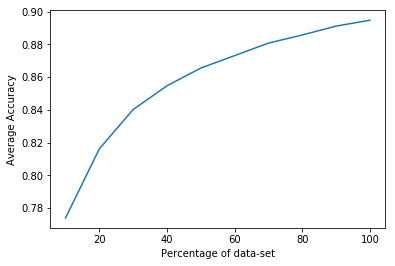

In [34]:
x_axis = [10*i for i in range(1,11)]
y_axis = avg_scores_knn
import matplotlib.pyplot as plt
plt.plot(x_axis,y_axis)
plt.xlabel('Percentage of data-set')
plt.ylabel('Average Accuracy')
plt.savefig('../dataset/bigdata3/result_knn/knn_bigdata3_test2.png')
plt.show()


In [ ]:
plt.savefig('../dataset/bigdata1/result_knn/knn_bigdata1_test1.png')

In [ ]:
plt.savefig('../dataset/bigdata1/result_knn/knn_bigdata1_test1pdf.')